In [2]:
#imports
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

In [3]:
#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn import linear_model

In [4]:
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [5]:
#cross validation
from sklearn.cross_validation import train_test_split

C:\Users\kalvarado\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
#Cleaning and Pre-processing
Data = pd.read_csv('BlackFridayNEW.csv', header =0)

In [6]:
Data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,1,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,1,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,1,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,1,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,3,4,0,8,0,0,7969


In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null int64
Stay_In_Current_City_Years    537577 non-null int64
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null int64
Product_Category_3            537577 non-null int64
Purchase                      537577 non-null int64
dtypes: int64(9), object(3)
memory usage: 49.2+ MB


In [8]:
Data.describe()

,User_ID,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,2.040567,1.859458,0.408797,5.295546,6.784907,3.871773,9333.859853
std,1.714393e+03,6.52412,0.759627,1.289828,0.491612,3.750701,6.211618,6.265963,4981.022133
min,1.000001e+06,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,185.000000
25%,1.001495e+06,2.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,5866.000000
50%,1.003031e+06,7.00000,2.000000,2.000000,0.000000,5.000000,5.000000,0.000000,8062.000000
75%,1.004417e+06,14.00000,3.000000,3.000000,1.000000,8.000000,14.000000,8.000000,12073.000000
max,1.006040e+06,20.00000,3.000000,4.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [9]:
len(Data)

537577

In [10]:
#Correlation Matrix
corrMat = Data.corr()
print(corrMat)

                             User_ID  Occupation  City_Category  \
User_ID                     1.000000   -0.023024       0.024107   
Occupation                 -0.023024    1.000000       0.033781   
City_Category               0.024107    0.033781       1.000000   
Stay_In_Current_City_Years -0.030655    0.031203       0.019948   
Marital_Status              0.018732    0.024691       0.040173   
Product_Category_1          0.003687   -0.008114      -0.027444   
Product_Category_2          0.003663    0.006792       0.019535   
Product_Category_3          0.003938    0.011941       0.037751   
Purchase                    0.005389    0.021104       0.068507   

                            Stay_In_Current_City_Years  Marital_Status  \
User_ID                                      -0.030655        0.018732   
Occupation                                    0.031203        0.024691   
City_Category                                 0.019948        0.040173   
Stay_In_Current_City_Years       

In [11]:
#Covariance
covMat = Data.cov()
print(covMat)

                                 User_ID  Occupation  City_Category  \
User_ID                     2.939142e+06 -257.522212      31.394316   
Occupation                 -2.575222e+02   42.564139       0.167413   
City_Category               3.139432e+01    0.167413       0.577033   
Stay_In_Current_City_Years -6.778627e+01    0.262569       0.019545   
Marital_Status              1.578743e+01    0.079192       0.015002   
Product_Category_1          2.370829e+01   -0.198560      -0.078190   
Product_Category_2          3.900920e+01    0.275248       0.092178   
Product_Category_3          4.230483e+01    0.488144       0.179689   
Purchase                    4.602301e+04  685.823205     259.212384   

                            Stay_In_Current_City_Years  Marital_Status  \
User_ID                                     -67.786271       15.787429   
Occupation                                    0.262569        0.079192   
City_Category                                 0.019545        0.015

In [12]:
Data.shape

(537577, 12)

In [13]:
Data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [14]:
Data.rename(columns={'Product_Category_1':'ProdCat1'}, inplace=True)
depVar = Data['ProdCat1']
Data.rename(columns={'Product_Category_2':'ProdCat2'}, inplace=True)
depVar = Data['ProdCat2']
Data.rename(columns={'Product_Category_3':'ProdCat3'}, inplace=True)
depVar = Data['ProdCat3']

In [15]:
Data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'ProdCat1', 'ProdCat2',
       'ProdCat3', 'Purchase'],
      dtype='object')

In [16]:
Data.groupby(by='Age')

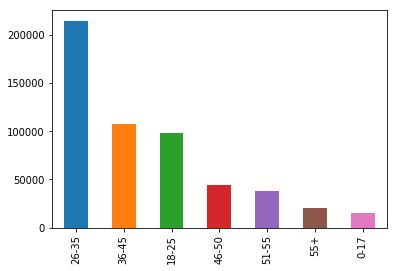

In [17]:
Data.Age.value_counts().plot(kind='bar')

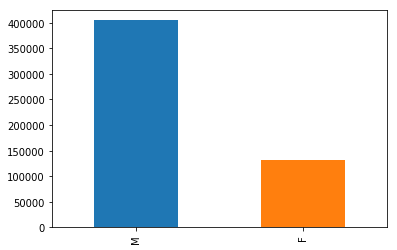

In [18]:
Data.Gender.value_counts().plot(kind='bar')

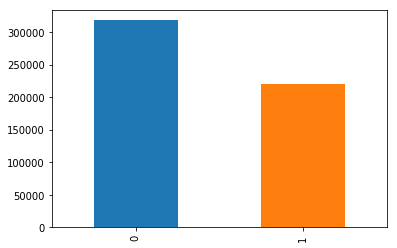

In [19]:
Data.Marital_Status.value_counts().plot(kind='bar')

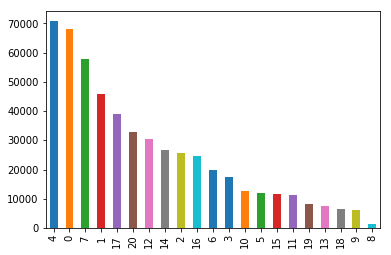

In [20]:
Data.Occupation.value_counts().plot(kind='bar')

In [21]:
Data["ProductCatSUM"] = Data["ProdCat1"] + Data["ProdCat2"] + Data["ProdCat3"]

In [22]:
Data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,ProdCat1,ProdCat2,ProdCat3,Purchase,ProductCatSUM
0,1000001,P00069042,F,0-17,10,1,2,0,3,0,0,8370,3
1,1000001,P00248942,F,0-17,10,1,2,0,1,6,14,15200,21
2,1000001,P00087842,F,0-17,10,1,2,0,12,0,0,1422,12
3,1000001,P00085442,F,0-17,10,1,2,0,12,14,0,1057,26
4,1000002,P00285442,M,55+,16,3,4,0,8,0,0,7969,8


In [25]:
Data['ProdCat'] = Data[['ProdCat1', 'ProdCat2', 'ProdCat3']].apply(lambda x: ''.join(x.astype(str)), axis=1)

In [26]:
Data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,ProdCat1,ProdCat2,ProdCat3,Purchase,ProductCatSUM,ProdCat
0,1000001,P00069042,F,0-17,10,1,2,0,3,0,0,8370,3,300
1,1000001,P00248942,F,0-17,10,1,2,0,1,6,14,15200,21,1614
2,1000001,P00087842,F,0-17,10,1,2,0,12,0,0,1422,12,1200
3,1000001,P00085442,F,0-17,10,1,2,0,12,14,0,1057,26,12140
4,1000002,P00285442,M,55+,16,3,4,0,8,0,0,7969,8,800


In [27]:
#Correlation Matrix
corrMat = Data.corr()
print(corrMat)

                             User_ID  Occupation  City_Category  \
User_ID                     1.000000   -0.023024       0.024107   
Occupation                 -0.023024    1.000000       0.033781   
City_Category               0.024107    0.033781       1.000000   
Stay_In_Current_City_Years -0.030655    0.031203       0.019948   
Marital_Status              0.018732    0.024691       0.040173   
ProdCat1                    0.003687   -0.008114      -0.027444   
ProdCat2                    0.003663    0.006792       0.019535   
ProdCat3                    0.003938    0.011941       0.037751   
Purchase                    0.005389    0.021104       0.068507   
ProductCatSUM               0.006903    0.009756       0.028730   

                            Stay_In_Current_City_Years  Marital_Status  \
User_ID                                      -0.030655        0.018732   
Occupation                                    0.031203        0.024691   
City_Category                           

In [28]:
Data['Age'].value_counts()

26-35    214690
36-45    107499
18-25     97634
46-50     44526
51-55     37618
55+       20903
0-17      14707
Name: Age, dtype: int64

In [29]:
Data['Gender'].value_counts()

M    405380
F    132197
Name: Gender, dtype: int64

In [30]:
Data['Occupation'].value_counts()

4     70862
0     68120
7     57806
1     45971
17    39090
20    32910
12    30423
14    26712
2     25845
16    24790
6     19822
3     17366
10    12623
5     11985
15    11812
11    11338
19     8352
13     7548
18     6525
9      6153
8      1524
Name: Occupation, dtype: int64

In [31]:
Data['Marital_Status'].value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

In [25]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

C:\Users\kalvarado\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


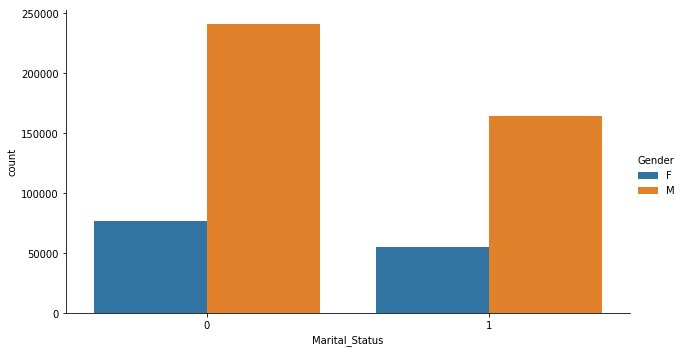

In [33]:
# Using saeborn to group by Sex and marital status
g = sns.factorplot('Marital_Status', data=Data, hue='Gender', kind='count', aspect=1.75)
g.set_xlabels('Marital_Status')

C:\Users\kalvarado\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


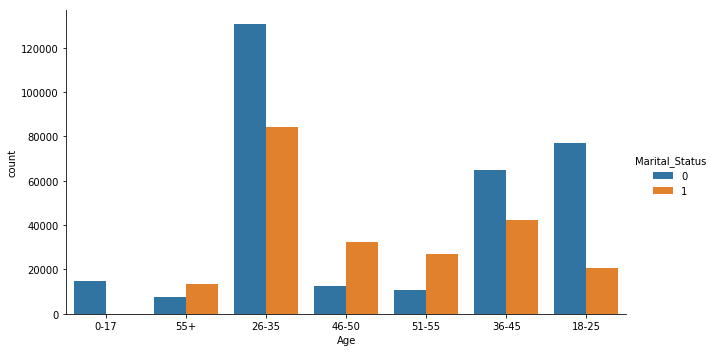

In [34]:
# Using saeborn to group by MARRIAGE and DEFAULT
g = sns.factorplot('Age', data=Data, hue='Marital_Status', kind='count', aspect=1.75)
g.set_xlabels('Age')

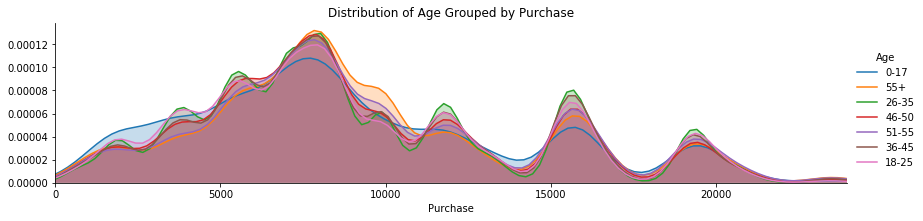

In [35]:
#Grouped by Balance Limit
fig = sns.FacetGrid(Data, hue='Age', aspect=4)
fig.map(sns.kdeplot, 'Purchase', shade=True)
oldest = Data['Purchase'].max()
fig.set(xlim=(0,oldest))
fig.set(title='Distribution of Age Grouped by Purchase')
fig.add_legend()

C:\Users\kalvarado\AppData\Local\Continuum\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


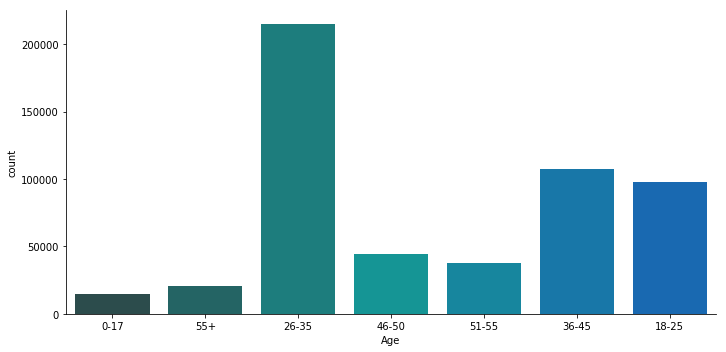

In [36]:
# Now lets factorplot the age_group. First transfer the d list into a data frame. Then rename the column 
sns.factorplot('Age', data=Data, kind='count', aspect=2, 
              palette='winter_d')

In [37]:
#features
features = Data.iloc[:,1:14]
print('Summary of feature sample')
features.head()

Summary of feature sample


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,ProdCat1,ProdCat2,ProdCat3,Purchase,ProductCatSUM,ProdCat
0,P00069042,F,0-17,10,1,2,0,3,0,0,8370,3,300
1,P00248942,F,0-17,10,1,2,0,1,6,14,15200,21,1614
2,P00087842,F,0-17,10,1,2,0,12,0,0,1422,12,1200
3,P00085442,F,0-17,10,1,2,0,12,14,0,1057,26,12140
4,P00285442,M,55+,16,3,4,0,8,0,0,7969,8,800


In [38]:
#dependent variable
depVar = Data['Purchase']

In [39]:
from sklearn.cross_validation import train_test_split

In [40]:
#Training Set (Feature Space: X Training)
X_train = (features[: 350000])
X_train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,ProdCat1,ProdCat2,ProdCat3,Purchase,ProductCatSUM,ProdCat
0,P00069042,F,0-17,10,1,2,0,3,0,0,8370,3,300
1,P00248942,F,0-17,10,1,2,0,1,6,14,15200,21,1614
2,P00087842,F,0-17,10,1,2,0,12,0,0,1422,12,1200
3,P00085442,F,0-17,10,1,2,0,12,14,0,1057,26,12140
4,P00285442,M,55+,16,3,4,0,8,0,0,7969,8,800


In [41]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 350000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 350000


0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [43]:
#Testing Set (X Testing)
X_test = features[-350000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 350000
       Product_ID Gender    Age  Occupation  City_Category  \
187577  P00074642      M  26-35           2              1   
187578  P00329542      M  26-35           2              1   
187579  P00277942      M  26-35           2              1   
187580  P00305142      M  26-35           2              1   
187581  P00259842      M  26-35           2              1   

        Stay_In_Current_City_Years  Marital_Status  ProdCat1  ProdCat2  \
187577                           1               1         5         9   
187578                           1               1         1        15   
187579                           1               1         1         0   
187580                           1               1         1         0   
187581                           1               1         1        14   

        ProdCat3  Purchase  ProductCatSUM ProdCat  
187577        14      3716             28    5914  
187578       

In [44]:
#Ground Truth (y_test) 
y_test = depVar[-350000:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 350000


187577     3716
187578     7883
187579    11688
187580     8183
187581     8313
Name: Purchase, dtype: int64

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)

In [46]:
X_train.shape, X_test.shape

((262500, 13), (87500, 13))

In [47]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression(n_jobs=10)

In [49]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [50]:
model.fit(X_train,y_train)

ValueError: could not convert string to float: '36-45'

In [56]:
Data['Age'].replace(['0-17'], '1', ['18-25'], '2', ['26-35'],'3', ['36-45'],'4', ['46-50'],'5', ['51-55'],'6', ['55+'],'7')

TypeError: replace() takes from 1 to 7 positional arguments but 15 were given

In [57]:
replace_values = {'0-17' : 1, '18-25' : 2, '26-35' : 3, '36,45' : 4, '46-50' : 5, '51-55' : 6, '55+' : 7}

In [61]:
Data = Data.replace({'Age': replace_values}) 

In [62]:
Data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,ProdCat1,ProdCat2,ProdCat3,Purchase,ProductCatSUM,ProdCat
0,1000001,P00069042,F,1,10,1,2,0,3,0,0,8370,3,300
1,1000001,P00248942,F,1,10,1,2,0,1,6,14,15200,21,1614
2,1000001,P00087842,F,1,10,1,2,0,12,0,0,1422,12,1200
3,1000001,P00085442,F,1,10,1,2,0,12,14,0,1057,26,12140
4,1000002,P00285442,M,7,16,3,4,0,8,0,0,7969,8,800


In [63]:
model.fit(X_train,y_train)

ValueError: could not convert string to float: '36-45'

In [64]:
Data1 = pd.read_csv('BlackFridayNEW1.csv', header =0)

In [66]:
#features
features = Data1.iloc[:,1:14]
print('Summary of feature sample')
features.head()

Summary of feature sample


,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,1,10,1,2,0,3,0,0,8370
1,P00248942,F,1,10,1,2,0,1,6,14,15200
2,P00087842,F,1,10,1,2,0,12,0,0,1422
3,P00085442,F,1,10,1,2,0,12,14,0,1057
4,P00285442,M,7,16,3,4,0,8,0,0,7969


In [65]:
#dependent variable
depVar = Data1['Purchase']

In [67]:
#Training Set (Feature Space: X Training)
X_train = (features[: 350000])
X_train.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,1,10,1,2,0,3,0,0,8370
1,P00248942,F,1,10,1,2,0,1,6,14,15200
2,P00087842,F,1,10,1,2,0,12,0,0,1422
3,P00085442,F,1,10,1,2,0,12,14,0,1057
4,P00285442,M,7,16,3,4,0,8,0,0,7969


In [68]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 350000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 350000


0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [69]:
#Testing Set (X Testing)
X_test = features[-350000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 350000
       Product_ID Gender  Age  Occupation  City_Category  \
187577  P00074642      M    3           2              1   
187578  P00329542      M    3           2              1   
187579  P00277942      M    3           2              1   
187580  P00305142      M    3           2              1   
187581  P00259842      M    3           2              1   

        Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
187577                           1               1                   5   
187578                           1               1                   1   
187579                           1               1                   1   
187580                           1               1                   1   
187581                           1               1                   1   

        Product_Category_2  Product_Category_3  Purchase  
187577                   9                  14      3716  
187578     

In [70]:
#Ground Truth (y_test) 
y_test = depVar[-350000:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 350000


187577     3716
187578     7883
187579    11688
187580     8183
187581     8313
Name: Purchase, dtype: int64

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((262500, 11), (87500, 11))

In [72]:
model = LinearRegression(n_jobs=10)

In [73]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [74]:
model.fit(X_train,y_train)

ValueError: could not convert string to float: 'F'

In [75]:
replace_values = {'F' : 1, 'M' : 0}

In [76]:
Data1 = Data1.replace({'Gender': replace_values}) 

In [77]:
Data1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,1,1,10,1,2,0,3,0,0,8370
1,1000001,P00248942,1,1,10,1,2,0,1,6,14,15200
2,1000001,P00087842,1,1,10,1,2,0,12,0,0,1422
3,1000001,P00085442,1,1,10,1,2,0,12,14,0,1057
4,1000002,P00285442,0,7,16,3,4,0,8,0,0,7969


In [78]:
model.fit(X_train,y_train)

ValueError: could not convert string to float: 'F'

In [6]:
DataNew = pd.read_csv('BlackFridayV1.csv', header =0)

In [7]:
#features
features = DataNew.iloc[:,2:14]
print('Summary of feature sample')
features.head()

Summary of feature sample


,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,1,10,1,2,0,3,0,0,8370
1,1,1,10,1,2,0,1,6,14,15200
2,1,1,10,1,2,0,12,0,0,1422
3,1,1,10,1,2,0,12,14,0,1057
4,0,7,16,3,4,0,8,0,0,7969


In [8]:
#dependent variable
depVar = DataNew['Purchase']

In [9]:
#Training Set (Feature Space: X Training)
X_train = (features[: 350000])
X_train.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1,1,10,1,2,0,3,0,0,8370
1,1,1,10,1,2,0,1,6,14,15200
2,1,1,10,1,2,0,12,0,0,1422
3,1,1,10,1,2,0,12,14,0,1057
4,0,7,16,3,4,0,8,0,0,7969


In [10]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 350000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 350000


0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [11]:
#Testing Set (X Testing)
X_test = features[-350000:]
X_test_count = len(X_test.index)
print('The number of observations in the feature testing set is:',str(X_test_count))
print(X_test.head())

The number of observations in the feature testing set is: 350000
        Gender  Age  Occupation  City_Category  Stay_In_Current_City_Years  \
187577       0    3           2              1                           1   
187578       0    3           2              1                           1   
187579       0    3           2              1                           1   
187580       0    3           2              1                           1   
187581       0    3           2              1                           1   

        Marital_Status  Product_Category_1  Product_Category_2  \
187577               1                   5                   9   
187578               1                   1                  15   
187579               1                   1                   0   
187580               1                   1                   0   
187581               1                   1                  14   

        Product_Category_3  Purchase  
187577                  14    

In [12]:
#Ground Truth (y_test) 
y_test = depVar[-350000:]
y_test_count = len(y_test.index)
print('The number of observations in the Y training set are:',str(y_test_count))
y_test.head()

The number of observations in the Y training set are: 350000


187577     3716
187578     7883
187579    11688
187580     8183
187581     8313
Name: Purchase, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train)
X_train.shape, X_test.shape

((262500, 10), (87500, 10))

In [14]:
model = LinearRegression(n_jobs=10)

In [15]:
#Models
modelSVR = SVR()
modelRF = RandomForestRegressor()
modelLR = LinearRegression()

In [23]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=10, normalize=False)

In [17]:
modelRF.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [25]:
modelSVR.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [20]:
modelLR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
print(cross_val_score(modelRF, X_train, y_train)) 

[ 0.99999997  0.99999998  0.99999998]


In [16]:
print(cross_val_score(modelSVR, X_train, y_train))

[-0.06504179 -0.06526591 -0.06333199]


In [17]:
print(cross_val_score(modelLR, X_train, y_train)) 

[ 1.  1.  1.]


In [18]:
#Model Fitting
modelRF.fit(X_train,y_train)
print(cross_val_score(modelRF, X_train, y_train))
modelRF.score(X_train,y_train)

[ 0.99999999  0.99999997  0.99999999]


0.99999999891233371

In [19]:
modelLR.fit(X_train,y_train)
print(cross_val_score(modelLR, X_train, y_train)) 
modelLR.score(X_train,y_train)

[ 1.  1.  1.]


1.0

In [20]:
predictions = modelRF.predict(X_test)

In [21]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [22]:
predRsquared = r2_score(y_test,predictions)

In [23]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 1.000
RMSE: 0.329


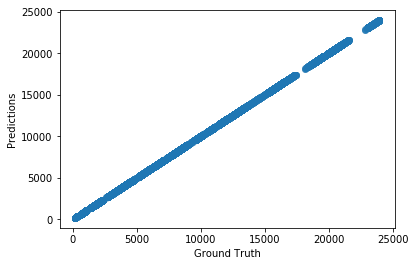

In [24]:
plt.scatter(y_test, predictions, alpha = 0.5)
plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show();

In [18]:
modelRF.score(X_train,y_train)

0.9999999986901742

In [21]:
modelLR.score(X_train,y_train)

1.0